# PCA For Dimentionallity Reduction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/preprocessed.csv')

In [ ]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month
0,50,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,...,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,False,False,12
1,50,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,...,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,False,False,12
2,50,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,...,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,False,False,12
3,50,9.2,28.0,0.0,14.6,8.9,11.0,24.0,13.0,14.0,...,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,False,False,12
4,50,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,False,False,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,49,2.8,23.4,0.0,1.4,7.8,15.0,31.0,13.0,13.0,...,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,False,False,6
145456,49,3.6,25.3,0.0,7.6,13.5,0.0,22.0,13.0,2.0,...,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,False,False,6
145457,49,5.4,26.9,0.0,6.8,11.0,3.0,37.0,13.0,3.0,...,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,False,False,6
145458,49,7.8,27.0,0.0,2.6,13.2,12.0,28.0,11.0,2.0,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,False,False,6


In [ ]:
X = df.drop('RainTomorrow', axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
explained_varience = []

for n in range(1, 22):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)

    explained_varience.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Varience Explained')

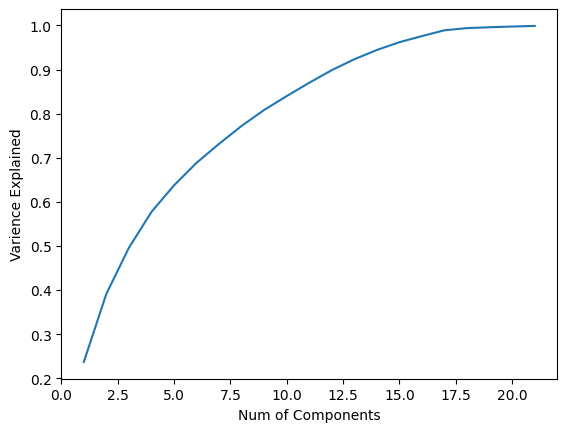

In [ ]:
plt.plot(range(1, 22), explained_varience)
plt.xlabel('Num of Components')
plt.ylabel('Varience Explained')

In [ ]:
pca = PCA(n_components=13)

In [ ]:
pca_result = pca.fit_transform(scaled_X)

In [ ]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9233647711673998)

We are keeping 92.33% varience by reducing the dimention to 13

In [ ]:
pca_result

array([[ 0.91712298, -0.98905141, -2.24782667, ..., -2.10583271,
        -0.22110746,  0.58857497],
       [ 1.174135  ,  0.29391662, -2.85285014, ..., -1.63054855,
        -1.33426964, -0.46413194],
       [ 1.78205857, -0.80175258, -2.07292604, ..., -1.74689511,
        -0.43801313, -0.16909539],
       ...,
       [ 0.72398013,  2.1860172 , -1.34552489, ..., -1.33523167,
         1.34439859,  0.17330082],
       [ 1.13824847,  2.77360083, -0.73728571, ...,  0.19021502,
         0.62688264,  0.23601931],
       [-0.12447508,  0.62777501,  0.81223836, ..., -0.20702108,
         0.10548588, -0.04028266]])

In [ ]:
index = []

for i in range(1, 14):
    index.append(f'PC{i}')

In [ ]:
new_df = pd.DataFrame(pca_result, columns=index)
new_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,0.917123,-0.989051,-2.247827,-0.334443,0.807366,1.416575,0.748832,-0.499977,-1.215516,1.222871,-2.105833,-0.221107,0.588575
1,1.174135,0.293917,-2.852850,-1.289379,0.655859,1.200021,1.157208,-0.188419,-0.821333,1.007782,-1.630549,-1.334270,-0.464132
2,1.782059,-0.801753,-2.072926,-0.001682,-0.497981,1.934214,0.866245,-0.061038,-1.638167,0.373370,-1.746895,-0.438013,-0.169095
3,2.513838,2.786418,0.065938,0.406823,1.078596,2.321191,1.976793,-0.571006,1.337436,-1.307408,0.759693,0.043168,-0.228548
4,1.337444,-1.402310,-0.386066,-1.891255,-0.146052,2.963744,0.761437,0.364900,-0.703809,0.490273,-0.123157,0.461421,2.004174
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.083291,3.717595,0.178249,1.472680,1.059254,1.243142,-0.465823,-1.173868,-1.591414,-0.183396,-0.240542,-0.156639,-0.381700
145456,0.017570,2.530786,-1.493913,-0.974231,0.510773,2.000113,-0.667787,0.344556,1.314210,2.062914,0.013595,1.574669,0.177982
145457,0.723980,2.186017,-1.345525,-0.705006,0.762100,1.645124,-0.586874,-0.136527,0.549743,1.498499,-1.335232,1.344399,0.173301
145458,1.138248,2.773601,-0.737286,-0.401495,1.368001,1.103656,-0.423628,-0.634946,-0.787863,1.276614,0.190215,0.626883,0.236019


In [ ]:
new_df['RainTomorrow'] = df['RainTomorrow']

In [ ]:
new_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,RainTomorrow
0,0.917123,-0.989051,-2.247827,-0.334443,0.807366,1.416575,0.748832,-0.499977,-1.215516,1.222871,-2.105833,-0.221107,0.588575,False
1,1.174135,0.293917,-2.852850,-1.289379,0.655859,1.200021,1.157208,-0.188419,-0.821333,1.007782,-1.630549,-1.334270,-0.464132,False
2,1.782059,-0.801753,-2.072926,-0.001682,-0.497981,1.934214,0.866245,-0.061038,-1.638167,0.373370,-1.746895,-0.438013,-0.169095,False
3,2.513838,2.786418,0.065938,0.406823,1.078596,2.321191,1.976793,-0.571006,1.337436,-1.307408,0.759693,0.043168,-0.228548,False
4,1.337444,-1.402310,-0.386066,-1.891255,-0.146052,2.963744,0.761437,0.364900,-0.703809,0.490273,-0.123157,0.461421,2.004174,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.083291,3.717595,0.178249,1.472680,1.059254,1.243142,-0.465823,-1.173868,-1.591414,-0.183396,-0.240542,-0.156639,-0.381700,False
145456,0.017570,2.530786,-1.493913,-0.974231,0.510773,2.000113,-0.667787,0.344556,1.314210,2.062914,0.013595,1.574669,0.177982,False
145457,0.723980,2.186017,-1.345525,-0.705006,0.762100,1.645124,-0.586874,-0.136527,0.549743,1.498499,-1.335232,1.344399,0.173301,False
145458,1.138248,2.773601,-0.737286,-0.401495,1.368001,1.103656,-0.423628,-0.634946,-0.787863,1.276614,0.190215,0.626883,0.236019,False


In [ ]:
new_df.to_csv('Reduced dataset.csv', index=False)